A random walk can help to understand the predictability of time series forecast problem.

### Random Series

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from random import seed
from random import randrange
from matplotlib import pyplot

A random **seed** (or seed state, or just seed) is a number (or vector) used to initialize a pseudorandom number generator.

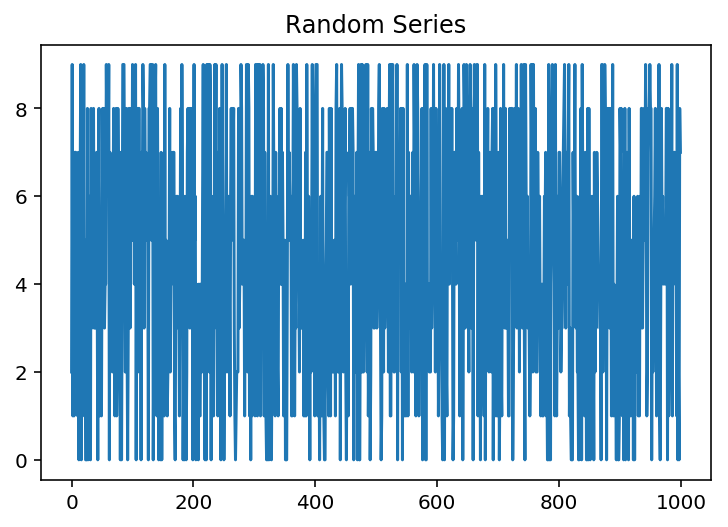

In [6]:
seed(1)
series = [randrange(10) for i in range(1000)]
pyplot.plot(series)
pyplot.title('Random Series')
pyplot.show()

This is not a random walk. It is just a sequence of random numbers.

### Random Walk

A random walk is different from a list of random numbers becasue the next value in the sequence is a modification of the previous value in the sequence.

The process used to generate the series forces dependence from one-time step to the next. This dependence provides some consistency from step-to-step rather than the large jumps that a series of independent, random numbers provides.

[White Noise](https://machinelearningmastery.com/white-noise-time-series-python/)